In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [52]:
# Load dataset
data_train  = pd.read_csv("Dataset/train.csv")
data_test   = pd.read_csv("Dataset/test.csv")
data_train  = data_train[["PassengerId","Survived","Pclass","Name",
                          "Sex","Age","SibSp","Parch",
                          "Ticket","Fare","Embarked"]]
data_test   = data_test[["PassengerId","Pclass","Name",
                          "Sex","Age","SibSp","Parch",
                          "Ticket","Fare","Embarked"]]
data_train.fillna(0)
data_test.fillna(0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,S


In [53]:
x_train     = data_train[["Pclass","Sex","Age","SibSp","Parch",
                          "Ticket","Fare","Embarked"]].values
y_train     = data_train[["Survived"]].values
row,coloumn = x_train.shape

In [54]:
# Encoding
# x
for i in range(coloumn):
    x_train[: , i] = LabelEncoder().fit_transform(x_train[:,i])
# y
y_train            = LabelEncoder().fit_transform(y_train)

C:\Python3_7\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [55]:
# Normalize X
maxx = []
minn = []
for i in range(coloumn):
    maxx.append(np.max(x_train[:,i]))
    minn.append(np.min(x_train[:,i]))
print(maxx)
print(minn)

[2, 1, 88, 6, 6, 680, 247, 3]
[0, 0, 0, 0, 0, 0, 0, 0]


In [56]:
# Normalize X
for i in range(coloumn):  
    for j in range(row):
        x_train[j , i] = (x_train[j , i]- minn[i])/(maxx[i]-minn[i])

In [57]:
x_train

array([[1.0, 1.0, 0.3181818181818182, ..., 0.7691176470588236,
        0.0728744939271255, 0.6666666666666666],
       [0.0, 0.0, 0.5795454545454546, ..., 0.8764705882352941,
        0.8380566801619433, 0.0],
       [1.0, 0.0, 0.38636363636363635, ..., 0.9838235294117647,
        0.1659919028340081, 0.6666666666666666],
       ...,
       [1.0, 0.0, 1.0, ..., 0.9926470588235294, 0.5303643724696356,
        0.6666666666666666],
       [0.0, 1.0, 0.38636363636363635, ..., 0.011764705882352941,
        0.6194331983805668, 0.0],
       [1.0, 1.0, 0.4772727272727273, ..., 0.6852941176470588,
        0.1214574898785425, 0.3333333333333333]], dtype=object)

In [58]:
# Function
def sigmoid(x):
  return 1/(1+np.exp(-x))
sig = np.vectorize(sigmoid)

In [59]:
#-------------------------------------
#- inisiasi

input       = x_train
target      = y_train
num_input   = 8
net_hidden1 = 16
net_hidden2 = 32
num_output  = 1

#Input-->Hidden Layer1
w_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(num_input,net_hidden1))
b_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1))
#Hidden Layer1-->Hidden Layer2
w_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1,net_hidden2))
b_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2))
#Hidden Layer2-->Output
w_output = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2,num_output))
b_output = np.random.uniform(low=-0.5, high=0.5, size=(num_output))

# Loss dan Akurasi
loss_values = []
acc_values  = []

lr     = 0.5
epochs = 2000

In [60]:
print(w_hidden1.shape)
print(w_hidden2.shape)
print(w_output.shape)

(8, 16)
(16, 32)
(32, 1)


In [61]:
list_w_hidden1 = []
list_w_hidden2 = []
list_w_output  = []
list_b_hidden1 = []
list_b_hidden2 = []
list_b_output  = []

for epoch in range(epochs):
    MSE = 0
    new_target = np.zeros(len(target))
    for idx, inp in enumerate(input):
        # A. Feedforward
        # Hidden Layer1
        o_hidden1 = np.matmul(input[idx], w_hidden1) + b_hidden1
        o_hidden1 = sig(o_hidden1)
        # Hidden Layer2
        o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
        o_hidden2 = sig(o_hidden2)
        # Outpur Layer
        o_output  = np.matmul(o_hidden2, w_output) + b_output
        o_output  = sig(o_output)
        # Menghitung Error
        error           = target[idx] - o_output
        MSE             = MSE + (error*error)
        new_target[idx] = o_output.round()
        # Error hidden2->output
        eh2             = error @ w_output.T
        # Error hidden1->output 
        eh1             = eh2   @ w_hidden2.T
        # B. Backpropagation
        # Outpur Layer
        w_output = w_output + (lr * ((error * o_output * (1 - o_output))* o_hidden2[np.newaxis].T))
        b_output = b_output + (lr * ((error * o_output * (1 - o_output))))
        # Hidden Layer2
        w_hidden2 = w_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2))* o_hidden1[np.newaxis].T)
        b_hidden2 = b_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2)))
        # Hidden Layer1
        w_hidden1 = w_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1))* input[idx][np.newaxis].T)
        b_hidden1 = b_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1)))
        
    MSE = MSE/len(target)
    acc = 1 - (np.sum(np.absolute(target-new_target))/len(target))
    loss_values.append(MSE)
    acc_values.append(acc)
    list_w_hidden1.append(w_hidden1)
    list_w_hidden2.append(w_hidden2)
    list_w_output.append(w_output)
    list_b_hidden1.append(b_hidden1)
    list_b_hidden2.append(b_hidden2)
    list_b_output.append(b_output)
    print("epoch : ",epoch," | error : ",MSE," | acc : ",acc)

acc_max   = max(acc_values)
index_max = acc_values.index(acc_max)
w_hidden1 = list_w_hidden1[index_max]
w_hidden2 = list_w_hidden2[index_max]
w_output  = list_w_output[index_max]
b_hidden1 = list_b_hidden1[index_max]
b_hidden2 = list_b_hidden2[index_max]
b_output  = list_b_output[index_max]

epoch :  0  | error :  [0.19862543]  | acc :  0.6947250280583614
epoch :  1  | error :  [0.15439232]  | acc :  0.7789001122334456
epoch :  2  | error :  [0.15020557]  | acc :  0.7890011223344556
epoch :  3  | error :  [0.14826113]  | acc :  0.7845117845117845
epoch :  4  | error :  [0.14714084]  | acc :  0.7912457912457913
epoch :  5  | error :  [0.14638962]  | acc :  0.7946127946127945
epoch :  6  | error :  [0.14575755]  | acc :  0.7946127946127945
epoch :  7  | error :  [0.14511125]  | acc :  0.7968574635241302
epoch :  8  | error :  [0.14443815]  | acc :  0.797979797979798
epoch :  9  | error :  [0.14377771]  | acc :  0.8002244668911336
epoch :  10  | error :  [0.14315484]  | acc :  0.8035914702581369
epoch :  11  | error :  [0.14257783]  | acc :  0.8103254769921436
epoch :  12  | error :  [0.14204829]  | acc :  0.8092031425364759
epoch :  13  | error :  [0.14156387]  | acc :  0.8092031425364759
epoch :  14  | error :  [0.14111917]  | acc :  0.8092031425364759
epoch :  15  | error 

epoch :  125  | error :  [0.11559901]  | acc :  0.8417508417508417
epoch :  126  | error :  [0.11550977]  | acc :  0.840628507295174
epoch :  127  | error :  [0.11542467]  | acc :  0.840628507295174
epoch :  128  | error :  [0.11534328]  | acc :  0.840628507295174
epoch :  129  | error :  [0.11526506]  | acc :  0.840628507295174
epoch :  130  | error :  [0.11518943]  | acc :  0.8395061728395061
epoch :  131  | error :  [0.11511578]  | acc :  0.8395061728395061
epoch :  132  | error :  [0.11504353]  | acc :  0.8395061728395061
epoch :  133  | error :  [0.11497217]  | acc :  0.8383838383838383
epoch :  134  | error :  [0.11490131]  | acc :  0.8383838383838383
epoch :  135  | error :  [0.11483066]  | acc :  0.8383838383838383
epoch :  136  | error :  [0.11476005]  | acc :  0.8395061728395061
epoch :  137  | error :  [0.11468936]  | acc :  0.8395061728395061
epoch :  138  | error :  [0.11461853]  | acc :  0.840628507295174
epoch :  139  | error :  [0.11454751]  | acc :  0.840628507295174
e

epoch :  248  | error :  [0.10552027]  | acc :  0.8552188552188552
epoch :  249  | error :  [0.10539998]  | acc :  0.8585858585858586
epoch :  250  | error :  [0.10529225]  | acc :  0.8585858585858586
epoch :  251  | error :  [0.10518774]  | acc :  0.8585858585858586
epoch :  252  | error :  [0.10508483]  | acc :  0.8585858585858586
epoch :  253  | error :  [0.10498412]  | acc :  0.8585858585858586
epoch :  254  | error :  [0.10488568]  | acc :  0.8597081930415263
epoch :  255  | error :  [0.10478923]  | acc :  0.8597081930415263
epoch :  256  | error :  [0.10469449]  | acc :  0.8597081930415263
epoch :  257  | error :  [0.10460126]  | acc :  0.8608305274971941
epoch :  258  | error :  [0.10450944]  | acc :  0.8619528619528619
epoch :  259  | error :  [0.10441899]  | acc :  0.8619528619528619
epoch :  260  | error :  [0.1043299]  | acc :  0.8619528619528619
epoch :  261  | error :  [0.10424222]  | acc :  0.8619528619528619
epoch :  262  | error :  [0.10415598]  | acc :  0.8619528619528

epoch :  371  | error :  [0.09836748]  | acc :  0.8709315375982043
epoch :  372  | error :  [0.09829372]  | acc :  0.8709315375982043
epoch :  373  | error :  [0.09822207]  | acc :  0.8731762065095399
epoch :  374  | error :  [0.0981522]  | acc :  0.8731762065095399
epoch :  375  | error :  [0.09808376]  | acc :  0.8731762065095399
epoch :  376  | error :  [0.09801635]  | acc :  0.8720538720538721
epoch :  377  | error :  [0.09794957]  | acc :  0.8720538720538721
epoch :  378  | error :  [0.09788306]  | acc :  0.8720538720538721
epoch :  379  | error :  [0.09781651]  | acc :  0.8720538720538721
epoch :  380  | error :  [0.09774968]  | acc :  0.8731762065095399
epoch :  381  | error :  [0.09768236]  | acc :  0.8731762065095399
epoch :  382  | error :  [0.09761444]  | acc :  0.8731762065095399
epoch :  383  | error :  [0.09754581]  | acc :  0.8742985409652076
epoch :  384  | error :  [0.09747643]  | acc :  0.8742985409652076
epoch :  385  | error :  [0.09740629]  | acc :  0.8742985409652

epoch :  494  | error :  [0.09319251]  | acc :  0.8742985409652076
epoch :  495  | error :  [0.09319058]  | acc :  0.8754208754208754
epoch :  496  | error :  [0.09320192]  | acc :  0.8754208754208754
epoch :  497  | error :  [0.0932241]  | acc :  0.8754208754208754
epoch :  498  | error :  [0.09325431]  | acc :  0.8765432098765432
epoch :  499  | error :  [0.09328875]  | acc :  0.877665544332211
epoch :  500  | error :  [0.09332208]  | acc :  0.877665544332211
epoch :  501  | error :  [0.09334771]  | acc :  0.8765432098765432
epoch :  502  | error :  [0.09335897]  | acc :  0.8787878787878788
epoch :  503  | error :  [0.09335153]  | acc :  0.8799102132435466
epoch :  504  | error :  [0.09332549]  | acc :  0.8799102132435466
epoch :  505  | error :  [0.09328554]  | acc :  0.8799102132435466
epoch :  506  | error :  [0.09323922]  | acc :  0.8799102132435466
epoch :  507  | error :  [0.09319368]  | acc :  0.8821548821548821
epoch :  508  | error :  [0.09315345]  | acc :  0.881032547699214

epoch :  617  | error :  [0.08601279]  | acc :  0.8900112233445567
epoch :  618  | error :  [0.08728253]  | acc :  0.8877665544332211
epoch :  619  | error :  [0.08635775]  | acc :  0.8900112233445567
epoch :  620  | error :  [0.08976859]  | acc :  0.8799102132435466
epoch :  621  | error :  [0.08864333]  | acc :  0.8843995510662177
epoch :  622  | error :  [0.08779041]  | acc :  0.8866442199775533
epoch :  623  | error :  [0.08972133]  | acc :  0.8855218855218855
epoch :  624  | error :  [0.08643646]  | acc :  0.8911335578002244
epoch :  625  | error :  [0.088325]  | acc :  0.8832772166105499
epoch :  626  | error :  [0.09024203]  | acc :  0.8799102132435466
epoch :  627  | error :  [0.09008566]  | acc :  0.8821548821548821
epoch :  628  | error :  [0.08918882]  | acc :  0.8832772166105499
epoch :  629  | error :  [0.0905074]  | acc :  0.8810325476992144
epoch :  630  | error :  [0.08953802]  | acc :  0.8832772166105499
epoch :  631  | error :  [0.08974764]  | acc :  0.883277216610549

epoch :  740  | error :  [0.08697295]  | acc :  0.8866442199775533
epoch :  741  | error :  [0.08792927]  | acc :  0.8843995510662177
epoch :  742  | error :  [0.08682854]  | acc :  0.8888888888888888
epoch :  743  | error :  [0.08802618]  | acc :  0.8821548821548821
epoch :  744  | error :  [0.08686774]  | acc :  0.8877665544332211
epoch :  745  | error :  [0.08819089]  | acc :  0.8832772166105499
epoch :  746  | error :  [0.08700061]  | acc :  0.8843995510662177
epoch :  747  | error :  [0.08825645]  | acc :  0.8810325476992144
epoch :  748  | error :  [0.087078]  | acc :  0.8843995510662177
epoch :  749  | error :  [0.08847044]  | acc :  0.8821548821548821
epoch :  750  | error :  [0.08632391]  | acc :  0.8855218855218855
epoch :  751  | error :  [0.08842532]  | acc :  0.8810325476992144
epoch :  752  | error :  [0.08658595]  | acc :  0.8855218855218855
epoch :  753  | error :  [0.08843294]  | acc :  0.8832772166105499
epoch :  754  | error :  [0.08606051]  | acc :  0.88776655443322

epoch :  863  | error :  [0.0904424]  | acc :  0.8843995510662177
epoch :  864  | error :  [0.08933093]  | acc :  0.8832772166105499
epoch :  865  | error :  [0.0920992]  | acc :  0.877665544332211
epoch :  866  | error :  [0.09167798]  | acc :  0.877665544332211
epoch :  867  | error :  [0.0884704]  | acc :  0.8866442199775533
epoch :  868  | error :  [0.09037698]  | acc :  0.8810325476992144
epoch :  869  | error :  [0.08921365]  | acc :  0.8799102132435466
epoch :  870  | error :  [0.08917213]  | acc :  0.8821548821548821
epoch :  871  | error :  [0.08917149]  | acc :  0.8832772166105499
epoch :  872  | error :  [0.08956895]  | acc :  0.8821548821548821
epoch :  873  | error :  [0.08992695]  | acc :  0.8821548821548821
epoch :  874  | error :  [0.08976266]  | acc :  0.8821548821548821
epoch :  875  | error :  [0.09022032]  | acc :  0.8787878787878788
epoch :  876  | error :  [0.08855001]  | acc :  0.8866442199775533
epoch :  877  | error :  [0.08715903]  | acc :  0.8866442199775533


epoch :  986  | error :  [0.08223686]  | acc :  0.8933782267115601
epoch :  987  | error :  [0.08187054]  | acc :  0.8945005611672279
epoch :  988  | error :  [0.08207889]  | acc :  0.8922558922558923
epoch :  989  | error :  [0.08205349]  | acc :  0.8911335578002244
epoch :  990  | error :  [0.08288438]  | acc :  0.8888888888888888
epoch :  991  | error :  [0.08329692]  | acc :  0.8877665544332211
epoch :  992  | error :  [0.07979443]  | acc :  0.8967452300785634
epoch :  993  | error :  [0.08212244]  | acc :  0.8888888888888888
epoch :  994  | error :  [0.08133686]  | acc :  0.8911335578002244
epoch :  995  | error :  [0.08123626]  | acc :  0.8900112233445567
epoch :  996  | error :  [0.08242238]  | acc :  0.8933782267115601
epoch :  997  | error :  [0.08056802]  | acc :  0.8956228956228957
epoch :  998  | error :  [0.07967292]  | acc :  0.8967452300785634
epoch :  999  | error :  [0.08080197]  | acc :  0.8900112233445567
epoch :  1000  | error :  [0.08119831]  | acc :  0.89113355780

epoch :  1107  | error :  [0.07772057]  | acc :  0.9001122334455668
epoch :  1108  | error :  [0.07814206]  | acc :  0.898989898989899
epoch :  1109  | error :  [0.07767496]  | acc :  0.8978675645342312
epoch :  1110  | error :  [0.07756471]  | acc :  0.8978675645342312
epoch :  1111  | error :  [0.07737178]  | acc :  0.898989898989899
epoch :  1112  | error :  [0.0810921]  | acc :  0.8911335578002244
epoch :  1113  | error :  [0.07739058]  | acc :  0.898989898989899
epoch :  1114  | error :  [0.07962788]  | acc :  0.8956228956228957
epoch :  1115  | error :  [0.07651088]  | acc :  0.9001122334455668
epoch :  1116  | error :  [0.07872962]  | acc :  0.8978675645342312
epoch :  1117  | error :  [0.07782509]  | acc :  0.8978675645342312
epoch :  1118  | error :  [0.07779207]  | acc :  0.8967452300785634
epoch :  1119  | error :  [0.07743188]  | acc :  0.8956228956228957
epoch :  1120  | error :  [0.07705883]  | acc :  0.8978675645342312
epoch :  1121  | error :  [0.08030238]  | acc :  0.8

epoch :  1228  | error :  [0.077834]  | acc :  0.8978675645342312
epoch :  1229  | error :  [0.07788637]  | acc :  0.898989898989899
epoch :  1230  | error :  [0.07763472]  | acc :  0.898989898989899
epoch :  1231  | error :  [0.07789701]  | acc :  0.9001122334455668
epoch :  1232  | error :  [0.07796128]  | acc :  0.898989898989899
epoch :  1233  | error :  [0.0776403]  | acc :  0.9001122334455668
epoch :  1234  | error :  [0.07711791]  | acc :  0.9001122334455668
epoch :  1235  | error :  [0.07755064]  | acc :  0.9012345679012346
epoch :  1236  | error :  [0.07788262]  | acc :  0.9001122334455668
epoch :  1237  | error :  [0.0778701]  | acc :  0.9034792368125701
epoch :  1238  | error :  [0.08090532]  | acc :  0.898989898989899
epoch :  1239  | error :  [0.07933218]  | acc :  0.898989898989899
epoch :  1240  | error :  [0.07888981]  | acc :  0.8978675645342312
epoch :  1241  | error :  [0.07784477]  | acc :  0.9023569023569024
epoch :  1242  | error :  [0.07691238]  | acc :  0.901234

epoch :  1349  | error :  [0.07732263]  | acc :  0.8978675645342312
epoch :  1350  | error :  [0.07820699]  | acc :  0.8978675645342312
epoch :  1351  | error :  [0.077475]  | acc :  0.8978675645342312
epoch :  1352  | error :  [0.07715681]  | acc :  0.898989898989899
epoch :  1353  | error :  [0.07612516]  | acc :  0.9001122334455668
epoch :  1354  | error :  [0.07648151]  | acc :  0.9012345679012346
epoch :  1355  | error :  [0.0760384]  | acc :  0.898989898989899
epoch :  1356  | error :  [0.07824479]  | acc :  0.8978675645342312
epoch :  1357  | error :  [0.08280389]  | acc :  0.8911335578002244
epoch :  1358  | error :  [0.07976612]  | acc :  0.898989898989899
epoch :  1359  | error :  [0.07572685]  | acc :  0.9023569023569024
epoch :  1360  | error :  [0.076804]  | acc :  0.9012345679012346
epoch :  1361  | error :  [0.07752321]  | acc :  0.898989898989899
epoch :  1362  | error :  [0.07729525]  | acc :  0.8978675645342312
epoch :  1363  | error :  [0.07615189]  | acc :  0.902356

epoch :  1470  | error :  [0.08894989]  | acc :  0.8821548821548821
epoch :  1471  | error :  [0.08934263]  | acc :  0.8810325476992144
epoch :  1472  | error :  [0.08706109]  | acc :  0.8855218855218855
epoch :  1473  | error :  [0.08468414]  | acc :  0.8888888888888888
epoch :  1474  | error :  [0.08273363]  | acc :  0.8922558922558923
epoch :  1475  | error :  [0.08171476]  | acc :  0.8922558922558923
epoch :  1476  | error :  [0.08241229]  | acc :  0.8922558922558923
epoch :  1477  | error :  [0.0825992]  | acc :  0.8888888888888888
epoch :  1478  | error :  [0.08100505]  | acc :  0.8877665544332211
epoch :  1479  | error :  [0.0851248]  | acc :  0.8855218855218855
epoch :  1480  | error :  [0.08373039]  | acc :  0.8956228956228957
epoch :  1481  | error :  [0.09100414]  | acc :  0.8832772166105499
epoch :  1482  | error :  [0.08187838]  | acc :  0.8945005611672279
epoch :  1483  | error :  [0.09564051]  | acc :  0.8731762065095399
epoch :  1484  | error :  [0.0850111]  | acc :  0.

epoch :  1591  | error :  [0.08071631]  | acc :  0.8911335578002244
epoch :  1592  | error :  [0.08049276]  | acc :  0.8900112233445567
epoch :  1593  | error :  [0.08055065]  | acc :  0.8900112233445567
epoch :  1594  | error :  [0.08084742]  | acc :  0.8866442199775533
epoch :  1595  | error :  [0.0803027]  | acc :  0.8911335578002244
epoch :  1596  | error :  [0.08024915]  | acc :  0.8911335578002244
epoch :  1597  | error :  [0.0802802]  | acc :  0.8888888888888888
epoch :  1598  | error :  [0.08013593]  | acc :  0.8911335578002244
epoch :  1599  | error :  [0.08007243]  | acc :  0.8900112233445567
epoch :  1600  | error :  [0.08004553]  | acc :  0.8911335578002244
epoch :  1601  | error :  [0.07998318]  | acc :  0.8911335578002244
epoch :  1602  | error :  [0.08011992]  | acc :  0.8900112233445567
epoch :  1603  | error :  [0.08158017]  | acc :  0.8877665544332211
epoch :  1604  | error :  [0.07976783]  | acc :  0.8933782267115601
epoch :  1605  | error :  [0.08010332]  | acc :  0

epoch :  1712  | error :  [0.08085641]  | acc :  0.8945005611672279
epoch :  1713  | error :  [0.07993088]  | acc :  0.8933782267115601
epoch :  1714  | error :  [0.07901827]  | acc :  0.8956228956228957
epoch :  1715  | error :  [0.07815137]  | acc :  0.8956228956228957
epoch :  1716  | error :  [0.07895001]  | acc :  0.8956228956228957
epoch :  1717  | error :  [0.08179556]  | acc :  0.8922558922558923
epoch :  1718  | error :  [0.07830301]  | acc :  0.8967452300785634
epoch :  1719  | error :  [0.07786282]  | acc :  0.8978675645342312
epoch :  1720  | error :  [0.0797207]  | acc :  0.8967452300785634
epoch :  1721  | error :  [0.07771334]  | acc :  0.8956228956228957
epoch :  1722  | error :  [0.07841914]  | acc :  0.8933782267115601
epoch :  1723  | error :  [0.07985123]  | acc :  0.8933782267115601
epoch :  1724  | error :  [0.08180184]  | acc :  0.8888888888888888
epoch :  1725  | error :  [0.08104495]  | acc :  0.8911335578002244
epoch :  1726  | error :  [0.0791294]  | acc :  0

epoch :  1833  | error :  [0.07698077]  | acc :  0.8945005611672279
epoch :  1834  | error :  [0.07718903]  | acc :  0.8922558922558923
epoch :  1835  | error :  [0.07746172]  | acc :  0.8945005611672279
epoch :  1836  | error :  [0.07833094]  | acc :  0.8900112233445567
epoch :  1837  | error :  [0.07701424]  | acc :  0.8945005611672279
epoch :  1838  | error :  [0.07675242]  | acc :  0.8922558922558923
epoch :  1839  | error :  [0.07695098]  | acc :  0.8945005611672279
epoch :  1840  | error :  [0.076841]  | acc :  0.8933782267115601
epoch :  1841  | error :  [0.07712416]  | acc :  0.8945005611672279
epoch :  1842  | error :  [0.07724421]  | acc :  0.8945005611672279
epoch :  1843  | error :  [0.07820059]  | acc :  0.8922558922558923
epoch :  1844  | error :  [0.07675701]  | acc :  0.8956228956228957
epoch :  1845  | error :  [0.07838647]  | acc :  0.8933782267115601
epoch :  1846  | error :  [0.08046625]  | acc :  0.8911335578002244
epoch :  1847  | error :  [0.08095556]  | acc :  0

epoch :  1954  | error :  [0.07864583]  | acc :  0.8900112233445567
epoch :  1955  | error :  [0.07873125]  | acc :  0.8911335578002244
epoch :  1956  | error :  [0.07795429]  | acc :  0.8911335578002244
epoch :  1957  | error :  [0.0780506]  | acc :  0.8911335578002244
epoch :  1958  | error :  [0.07899002]  | acc :  0.8900112233445567
epoch :  1959  | error :  [0.07895261]  | acc :  0.8888888888888888
epoch :  1960  | error :  [0.07970748]  | acc :  0.8900112233445567
epoch :  1961  | error :  [0.0780044]  | acc :  0.8900112233445567
epoch :  1962  | error :  [0.07784602]  | acc :  0.8922558922558923
epoch :  1963  | error :  [0.07834913]  | acc :  0.8900112233445567
epoch :  1964  | error :  [0.07770693]  | acc :  0.8922558922558923
epoch :  1965  | error :  [0.07752837]  | acc :  0.8945005611672279
epoch :  1966  | error :  [0.07798468]  | acc :  0.8900112233445567
epoch :  1967  | error :  [0.07755045]  | acc :  0.8945005611672279
epoch :  1968  | error :  [0.07773411]  | acc :  0

epoch :  2075  | error :  [0.07997498]  | acc :  0.8843995510662177
epoch :  2076  | error :  [0.07982493]  | acc :  0.8821548821548821
epoch :  2077  | error :  [0.0798611]  | acc :  0.8810325476992144
epoch :  2078  | error :  [0.08079657]  | acc :  0.8810325476992144
epoch :  2079  | error :  [0.08023011]  | acc :  0.8810325476992144
epoch :  2080  | error :  [0.08060353]  | acc :  0.8787878787878788
epoch :  2081  | error :  [0.08117063]  | acc :  0.8866442199775533
epoch :  2082  | error :  [0.0815033]  | acc :  0.8810325476992144
epoch :  2083  | error :  [0.080853]  | acc :  0.8810325476992144
epoch :  2084  | error :  [0.08058524]  | acc :  0.8832772166105499
epoch :  2085  | error :  [0.08193007]  | acc :  0.8855218855218855
epoch :  2086  | error :  [0.08149495]  | acc :  0.8821548821548821
epoch :  2087  | error :  [0.08000713]  | acc :  0.8821548821548821
epoch :  2088  | error :  [0.08025249]  | acc :  0.8832772166105499
epoch :  2089  | error :  [0.08015561]  | acc :  0.8

epoch :  2196  | error :  [0.08204331]  | acc :  0.8821548821548821
epoch :  2197  | error :  [0.07943423]  | acc :  0.8832772166105499
epoch :  2198  | error :  [0.07945777]  | acc :  0.8821548821548821
epoch :  2199  | error :  [0.07984367]  | acc :  0.8810325476992144
epoch :  2200  | error :  [0.07928309]  | acc :  0.8799102132435466
epoch :  2201  | error :  [0.07958105]  | acc :  0.8821548821548821
epoch :  2202  | error :  [0.07917535]  | acc :  0.8810325476992144
epoch :  2203  | error :  [0.07944403]  | acc :  0.8821548821548821
epoch :  2204  | error :  [0.08003694]  | acc :  0.8832772166105499
epoch :  2205  | error :  [0.07933488]  | acc :  0.8821548821548821
epoch :  2206  | error :  [0.08071514]  | acc :  0.8832772166105499
epoch :  2207  | error :  [0.07977784]  | acc :  0.8799102132435466
epoch :  2208  | error :  [0.08365875]  | acc :  0.8765432098765432
epoch :  2209  | error :  [0.08107211]  | acc :  0.8787878787878788
epoch :  2210  | error :  [0.07897727]  | acc : 

epoch :  2317  | error :  [0.07797262]  | acc :  0.8855218855218855
epoch :  2318  | error :  [0.07803603]  | acc :  0.8877665544332211
epoch :  2319  | error :  [0.07821732]  | acc :  0.8855218855218855
epoch :  2320  | error :  [0.0782054]  | acc :  0.8866442199775533
epoch :  2321  | error :  [0.0789923]  | acc :  0.8855218855218855
epoch :  2322  | error :  [0.07807019]  | acc :  0.8866442199775533
epoch :  2323  | error :  [0.07803656]  | acc :  0.8877665544332211
epoch :  2324  | error :  [0.07834057]  | acc :  0.8855218855218855
epoch :  2325  | error :  [0.07808833]  | acc :  0.8866442199775533
epoch :  2326  | error :  [0.07856882]  | acc :  0.8843995510662177
epoch :  2327  | error :  [0.078108]  | acc :  0.8866442199775533
epoch :  2328  | error :  [0.07795335]  | acc :  0.8877665544332211
epoch :  2329  | error :  [0.07829716]  | acc :  0.8855218855218855
epoch :  2330  | error :  [0.07815448]  | acc :  0.8877665544332211
epoch :  2331  | error :  [0.0782515]  | acc :  0.88

epoch :  2438  | error :  [0.07754193]  | acc :  0.8855218855218855
epoch :  2439  | error :  [0.07758292]  | acc :  0.8855218855218855
epoch :  2440  | error :  [0.077727]  | acc :  0.8843995510662177
epoch :  2441  | error :  [0.07797551]  | acc :  0.8821548821548821
epoch :  2442  | error :  [0.07751509]  | acc :  0.8843995510662177
epoch :  2443  | error :  [0.07775065]  | acc :  0.8866442199775533
epoch :  2444  | error :  [0.07755984]  | acc :  0.8832772166105499
epoch :  2445  | error :  [0.07753062]  | acc :  0.8843995510662177
epoch :  2446  | error :  [0.07758451]  | acc :  0.8843995510662177
epoch :  2447  | error :  [0.07748118]  | acc :  0.8843995510662177
epoch :  2448  | error :  [0.07746701]  | acc :  0.8855218855218855
epoch :  2449  | error :  [0.0775276]  | acc :  0.8866442199775533
epoch :  2450  | error :  [0.07748316]  | acc :  0.8843995510662177
epoch :  2451  | error :  [0.07750277]  | acc :  0.8855218855218855
epoch :  2452  | error :  [0.07744705]  | acc :  0.

epoch :  2559  | error :  [0.0802849]  | acc :  0.8832772166105499
epoch :  2560  | error :  [0.0779623]  | acc :  0.8855218855218855
epoch :  2561  | error :  [0.08028872]  | acc :  0.8855218855218855
epoch :  2562  | error :  [0.07983694]  | acc :  0.8866442199775533
epoch :  2563  | error :  [0.07982669]  | acc :  0.8843995510662177
epoch :  2564  | error :  [0.07742128]  | acc :  0.8900112233445567
epoch :  2565  | error :  [0.08072192]  | acc :  0.8888888888888888
epoch :  2566  | error :  [0.07775702]  | acc :  0.8900112233445567
epoch :  2567  | error :  [0.07965324]  | acc :  0.8866442199775533
epoch :  2568  | error :  [0.08058877]  | acc :  0.8866442199775533
epoch :  2569  | error :  [0.07864248]  | acc :  0.8866442199775533
epoch :  2570  | error :  [0.07784204]  | acc :  0.8877665544332211
epoch :  2571  | error :  [0.07875429]  | acc :  0.8888888888888888
epoch :  2572  | error :  [0.07798775]  | acc :  0.8900112233445567
epoch :  2573  | error :  [0.07786188]  | acc :  0

epoch :  2680  | error :  [0.07725017]  | acc :  0.8900112233445567
epoch :  2681  | error :  [0.07716435]  | acc :  0.8900112233445567
epoch :  2682  | error :  [0.07710453]  | acc :  0.8888888888888888
epoch :  2683  | error :  [0.0771374]  | acc :  0.8888888888888888
epoch :  2684  | error :  [0.07718509]  | acc :  0.8900112233445567
epoch :  2685  | error :  [0.0771911]  | acc :  0.8900112233445567
epoch :  2686  | error :  [0.07716648]  | acc :  0.8900112233445567
epoch :  2687  | error :  [0.07706912]  | acc :  0.8888888888888888
epoch :  2688  | error :  [0.07716457]  | acc :  0.8888888888888888
epoch :  2689  | error :  [0.07712203]  | acc :  0.8900112233445567
epoch :  2690  | error :  [0.07711032]  | acc :  0.8888888888888888
epoch :  2691  | error :  [0.07717087]  | acc :  0.8900112233445567
epoch :  2692  | error :  [0.0771826]  | acc :  0.8900112233445567
epoch :  2693  | error :  [0.07727599]  | acc :  0.8900112233445567
epoch :  2694  | error :  [0.07739911]  | acc :  0.

epoch :  2801  | error :  [0.07694536]  | acc :  0.8877665544332211
epoch :  2802  | error :  [0.07698318]  | acc :  0.8877665544332211
epoch :  2803  | error :  [0.07708834]  | acc :  0.8877665544332211
epoch :  2804  | error :  [0.07697598]  | acc :  0.8877665544332211
epoch :  2805  | error :  [0.07786421]  | acc :  0.8855218855218855
epoch :  2806  | error :  [0.07697913]  | acc :  0.8855218855218855
epoch :  2807  | error :  [0.07809413]  | acc :  0.8843995510662177
epoch :  2808  | error :  [0.07750882]  | acc :  0.8855218855218855
epoch :  2809  | error :  [0.07683405]  | acc :  0.8866442199775533
epoch :  2810  | error :  [0.07732514]  | acc :  0.8877665544332211
epoch :  2811  | error :  [0.07725787]  | acc :  0.8877665544332211
epoch :  2812  | error :  [0.07678687]  | acc :  0.8877665544332211
epoch :  2813  | error :  [0.07672291]  | acc :  0.8900112233445567
epoch :  2814  | error :  [0.07677772]  | acc :  0.8866442199775533
epoch :  2815  | error :  [0.07837392]  | acc : 

epoch :  2922  | error :  [0.07678305]  | acc :  0.8855218855218855
epoch :  2923  | error :  [0.07706476]  | acc :  0.8877665544332211
epoch :  2924  | error :  [0.07674313]  | acc :  0.8866442199775533
epoch :  2925  | error :  [0.0767212]  | acc :  0.8866442199775533
epoch :  2926  | error :  [0.07744644]  | acc :  0.8855218855218855
epoch :  2927  | error :  [0.07668342]  | acc :  0.8866442199775533
epoch :  2928  | error :  [0.07674454]  | acc :  0.8866442199775533
epoch :  2929  | error :  [0.07670148]  | acc :  0.8877665544332211
epoch :  2930  | error :  [0.07690549]  | acc :  0.8877665544332211
epoch :  2931  | error :  [0.07661662]  | acc :  0.8866442199775533
epoch :  2932  | error :  [0.0767458]  | acc :  0.8855218855218855
epoch :  2933  | error :  [0.07735973]  | acc :  0.8866442199775533
epoch :  2934  | error :  [0.0767981]  | acc :  0.8855218855218855
epoch :  2935  | error :  [0.07687769]  | acc :  0.8877665544332211
epoch :  2936  | error :  [0.07674196]  | acc :  0.

epoch :  3043  | error :  [0.08232833]  | acc :  0.8866442199775533
epoch :  3044  | error :  [0.08073329]  | acc :  0.8832772166105499
epoch :  3045  | error :  [0.07801886]  | acc :  0.8877665544332211
epoch :  3046  | error :  [0.07799494]  | acc :  0.8866442199775533
epoch :  3047  | error :  [0.0774196]  | acc :  0.8855218855218855
epoch :  3048  | error :  [0.07813814]  | acc :  0.8843995510662177
epoch :  3049  | error :  [0.07784718]  | acc :  0.8843995510662177
epoch :  3050  | error :  [0.07744498]  | acc :  0.8843995510662177
epoch :  3051  | error :  [0.07741816]  | acc :  0.8855218855218855
epoch :  3052  | error :  [0.07830512]  | acc :  0.8843995510662177
epoch :  3053  | error :  [0.07738577]  | acc :  0.8855218855218855
epoch :  3054  | error :  [0.07754698]  | acc :  0.8855218855218855
epoch :  3055  | error :  [0.07737728]  | acc :  0.8843995510662177
epoch :  3056  | error :  [0.07814699]  | acc :  0.8855218855218855
epoch :  3057  | error :  [0.07751672]  | acc :  

KeyboardInterrupt: 

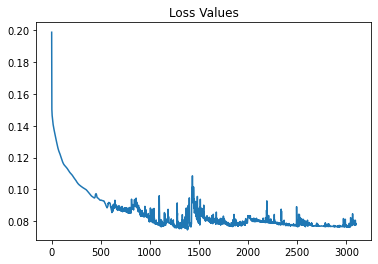

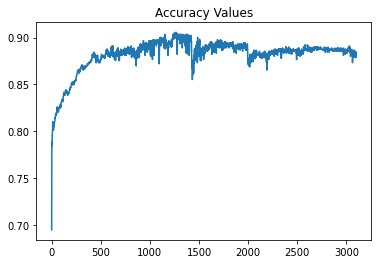

In [62]:
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.title("Loss Values")
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.title("Accuracy Values")
plt.show()

In [63]:
def predict(data):
    HasilPredict = []
    for i in data:
      # Hidden Layer1
      o_hidden1 = np.matmul(i, w_hidden1) + b_hidden1
      o_hidden1 = sig(o_hidden1)
      # Hidden Layer2
      o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
      o_hidden2 = sig(o_hidden2)
      # Outpur Layer
      o_output  = np.matmul(o_hidden2, w_output) + b_output
      o_output  = sig(o_output)
      HasilPredict.append(round(float(o_output)))
    return HasilPredict

In [292]:
prediksi = predict([data_x[8121]])
print(prediksi)
#e is 0
#p is 1
for i in prediksi :
  if i == 1 :
    print('Result : P')
  elif i == 0 :
    print('Result : E')

[0]
Result : E


In [288]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,w,o,e,w,v,l
